In [10]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [11]:
image_array=cv2.imread('/content/drive/MyDrive/Driver Drowsiness detection/Test_data/open_eyes/s0001_02268_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)

In [12]:
print(image_array)

[[91 89 87 ... 45 46 43]
 [91 90 90 ... 46 46 44]
 [90 89 90 ... 44 45 45]
 ...
 [56 59 59 ... 61 61 59]
 [60 59 59 ... 60 60 59]
 [59 59 59 ... 63 59 59]]


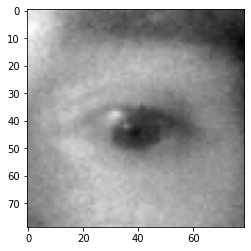

In [13]:
plt.imshow(image_array,cmap='gray')

In [15]:
image_array.shape

(79, 79)

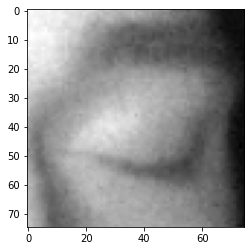

In [16]:
Datadirectory="/content/drive/MyDrive/Driver Drowsiness detection/Test_data"  #training dataset
Classes= ['closed_eyes','open_eyes']
for c in Classes:
  path=os.path.join(Datadirectory , c)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb= cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
  break

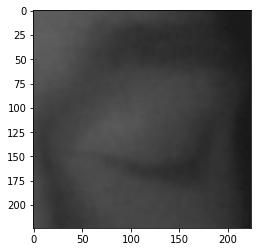

In [17]:
img_size= 224
new_array= cv2.resize(backtorgb, (img_size ,img_size))
plt.imshow(new_array, cmap='gray')
plt.show()

reading all the imgs and converting them into array

In [18]:
training_Data=[]

def create_training_Data():
  for c in Classes:
    path=os.path.join(Datadirectory,c)
    class_num=Classes.index(c)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img) , cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_array= cv2.resize(backtorgb, (img_size,img_size))
        training_Data.append([new_array, class_num])
      except Exception as e:
        pass

In [19]:
print(len(training_Data))

0


In [20]:
import random
random.shuffle(training_Data)

In [21]:
X=[]
y=[]

for features.label in training_Data:
  X.append(features)
  y.append(label)

X=np.array(X).reshape(-1, img_size,img_size, 3)

In [22]:
X.shape

(0, 224, 224, 3)

In [ ]:
 #normalize the data
 X=X/255.0;

In [ ]:
Y=np.array(y)

In [ ]:
import pickle

pickle_out =open('X.pickle','wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out =open('y.pickle','wb')
pickle.dump(y, pickle_out)
pickle_out.close()


In [ ]:
pickle_in =open('X.pickle','rb')
X= pickle.load(pickle_in)

pickle_in= open('y.pickle','rb')
y= pickle.load(pickle_in)

Deep learning model for training (transfer learning)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model=tf.keras.applications.MobileNet()


In [ ]:
model.summary()

TRANSFER LEARNING

In [ ]:
base_input=model.layers[0].input    #input

In [ ]:
base_output= model.layers[-4].output

In [ ]:
Flat_layer= layers.flatten()(base_output)
final_output= layers.Dense(1)(Flat_layer)
final_output= layers.Activation('sigmoid')(final_output)


In [ ]:
new_model= keras.Model(inputs= base_input, output= final_output)

In [ ]:
new_model.summary()

Settings for binary classification

In [ ]:
new_model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])


In [ ]:
new_model.fit(X,y, epochs=10, validation_split= 0.1)

In [ ]:
new_model.save('my_modelDrowsiness.h5')

Checking the network  for predictions

In [ ]:
img_array= cv2.imread('s0012_00255_0_0_1_1_02.png'), cv2.IMREAD_GRAYSCALE)
backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size, img_size))

In [ ]:
X_input= np.array(new_array).reshape(1,img_size,img_size,3)


In [ ]:
X_input.shape()

In [ ]:
X_input=X_input/255.0

In [ ]:
prediction=new_model.predict(X_input)

In [ ]:
prediction

Checking for random images

In [ ]:
img = cv2.imread('girl.jpg')

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [ ]:
eye_cascade= cv2.CascadeClassifier('haarcascade_eye.xml')


In [ ]:
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes= eye_cascade.detectMultiscale(gray,1,1,4)

In [ ]:
for(x,y,h,w) in eyes:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
#cropping the eye image
eye_cascade=cv2.CascadeClassifier('haarcascade_eye.xml')
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes= eye_cascade.detectMultiscale(gray,1,1,4)
for (x,y,w,h) in eyes:
  roi_gray=gray[y:y+h, x:x+w]
  roi_color=img[y:y+h, x:x+w]
  eyess= eye_cascade.detectMultiscale(roi_gray)
  if len(eyess)== 0:
    print('Eyes are not detected')
  else:
    for (cx,cy,cw,ch) in eyess:
      eyes_roi = roi_color(cy:cy+ch, cx:cx+cw)
      

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi), cv2.COLOR_BGR2RGB)

In [ ]:
eyes_roi.shape

In [ ]:
final_image= cv2.resize(eyes_roi,(224,224))
final_image= np.expand_dims(final_shape.axis=0)
final_image=final_image/255.0

In [ ]:
final_image.shape

In [ ]:
new_model.predict(final_image)

REAL TIME VIDEO

In [ ]:
import cv2
path='haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap= cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isopened():
  raise IDError('cannot Open Webcam')

while True:
  ret,frame=cap.read()
  eye_cascade= cv2.CascadeClassifier('haarcascade_eye.xml')
  gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  eyes= eye_cascade.detectMultiscale(gray,1,1,4)
  for (x,y,w,h) in eyes:
  roi_gray=gray[y:y+h, x:x+w]
  roi_color=img[y:y+h, x:x+w]
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  eyess= eye_cascade.detectMultiscale(roi_gray)
  if len(eyess)== 0:
    print('Eyes are not detected')
  else:
    for (cx,cy,cw,ch) in eyess:
      eyes_roi = roi_color(cy:cy+ch, cx:cx+cw)

  final_image= cv2.resize(eyes_roi,(224,224))
  final_image= np.expand_dims(final_shape.axis=0)
  final_image=final_image/255.0

  Predictions= new_model.predict(finale_image)
  if (predictions>0):
    status= 'Open Eyes'
  else:
    status= 'Closed Eyes'


  gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  print(faceCascade.empty())
  faces= faceCascade.detectMultiScale(gray,1,1,4)

  #draw rectangle around the faces
  for(x,y,h,w) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

  font= cv2.FONT_HERSHEY_SIMPLEX

  #insert text on video
  cv2.putText(frame,status,font,3,(0,0,255),2,cv2.LINE_4)
  cv2.imshow('Driver Drowsiness detection Projectt',frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()

Alarm generation if the eyes are closed for an unusual time

In [ ]:
import winsound
frequency =2500    #frequency of sound
duration= 1000     #1 second
import numpy as np
import cv2
path='haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap= cv2.VideoCapture(1)
if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isopened():
  raise IDError('cannot Open Webcam')

count=0
while True:
  ret,frame=cap.read()
  eye_cascade= cv2.CascadeClassifier('haarcascade_eye.xml')
  gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  eyes= eye_cascade.detectMultiscale(gray,1,1,4)
  for (x,y,w,h) in eyes:
  roi_gray=gray[y:y+h, x:x+w]
  roi_color=img[y:y+h, x:x+w]
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  eyess= eye_cascade.detectMultiscale(roi_gray)
  if len(eyess)== 0:
    print('Eyes are not detected')
  else:
    for (cx,cy,cw,ch) in eyess:
      eyes_roi = roi_color(cy:cy+ch, cx:cx+cw)

  font= cv2.FONT_HERSHEY_SIMPLEX

  final_image= cv2.resize(eyes_roi,(224,224))
  final_image= np.expand_dims(final_shape.axis=0)
  final_image=final_image/255.0

  Predictions= new_model.predict(finale_image)
  if (predictions>0):
    status= 'Open Eyes'
    cv2.putText(frame,status,(150,150),font,3,(0,255,0),2,cv2.LINE_4)
    
    x1,y1,w1,h1 = 0,0,175,175
    #draw a black rectangle
    cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
    #add text
    cv2.putText(frame, 'ACTIVE',(x1 + int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,255,0),2)
  else:
    status= 'Closed Eyes'
    count= count+1
    cv2.putText(frame,status,(150,150),font,3,(0,0,255),2,cv2.LINE_4)
    if count>5:
    
    x1,y1,w1,h1 = 0,0,175,175
    #draw a black rectangle
    cv2.rectangle(frame,(x1,y1),(x1+w1,y1+h1),(0,0,0),-1)
    #add text
    cv2.putText(frame, 'DROWSY ALERT!!!',(x1 + int(w1/10), y1+ int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,(0,255,0),2)


  gray= cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  print(faceCascade.empty())
  faces= faceCascade.detectMultiScale(gray,1,1,4)

  #draw rectangle around the faces
  for(x,y,h,w) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    windsound.Beep(frequency,duration)
    count=0
  
  #insert text on video
  cv2.putText(frame,status,font,3,(0,0,255),2,cv2.LINE_4)
  cv2.imshow('Driver Drowsiness detection Projectt',frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()